In [1]:
! gdown https://drive.google.com/u/0/uc?id=17WpSslT1bv81vHy3k1u0lo53_S10evDe

Downloading...
From: https://drive.google.com/u/0/uc?id=17WpSslT1bv81vHy3k1u0lo53_S10evDe
To: /content/CXR_Covid-19_Challenge.zip
3.61GB [00:56, 63.6MB/s]


In [2]:
! unzip -qq CXR_Covid-19_Challenge.zip

In [ ]:
# ! gdown https://drive.google.com/u/2/uc?id=1cpqqgbb77-1vt5-SvmQWV2Klla_tuLjD

Downloading...
From: https://drive.google.com/u/2/uc?id=1cpqqgbb77-1vt5-SvmQWV2Klla_tuLjD
To: /content/CXR_Covid-19_10e_Vgg16.h5
178MB [00:02, 79.5MB/s]


In [1]:
import glob
import cv2
import matplotlib.pyplot as plt

###########################
EPOCHS = 10
MODEL_NAME = 'VGG_16'
IMG_SIZE = '360x360'
OUTPUT_LAYERS = '128-32-3'
###########################

In [2]:
all_covid_files = glob.glob('/content/train/covid/*')
all_normal_files = glob.glob('/content/train/normal/*')
all_pneumo_files = glob.glob('/content/train/pneumonia/*')
print(len(all_covid_files)," ",len(all_normal_files)," ",len(all_pneumo_files)," ")

6534   7151   4273  


In [3]:
# plot it in histogram


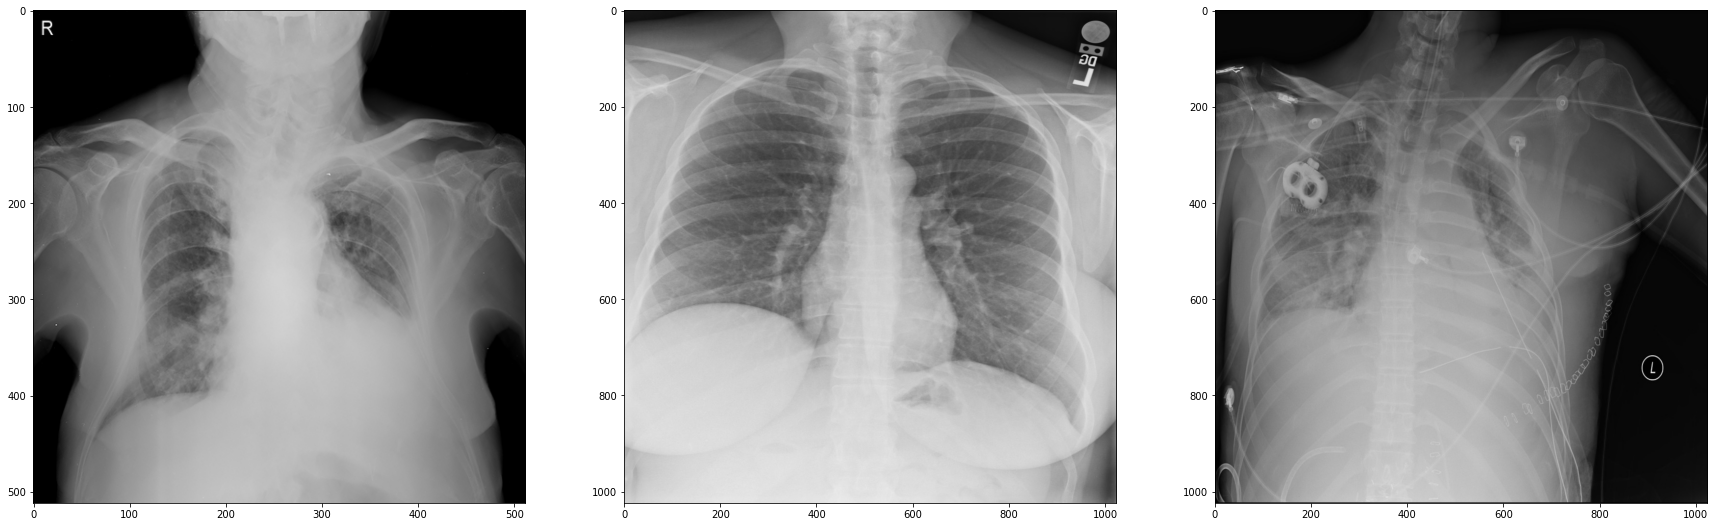

In [4]:

plt.figure(figsize=(30,10))
img_covid = cv2.imread(all_covid_files[0])
plt.subplot(1,3,1)
plt.imshow(img_covid)
img_normal = cv2.imread(all_normal_files[0])
plt.subplot(1,3,2)
plt.imshow(img_normal)
img_pneumo = cv2.imread(all_pneumo_files[0])
plt.subplot(1,3,3)
plt.imshow(img_pneumo)
plt.show()

In [ ]:
print(img_pneumo.shape)
print(img_covid.shape)
print(img_normal.shape)

(1024, 1024, 3)
(512, 512, 3)
(1024, 1024, 3)


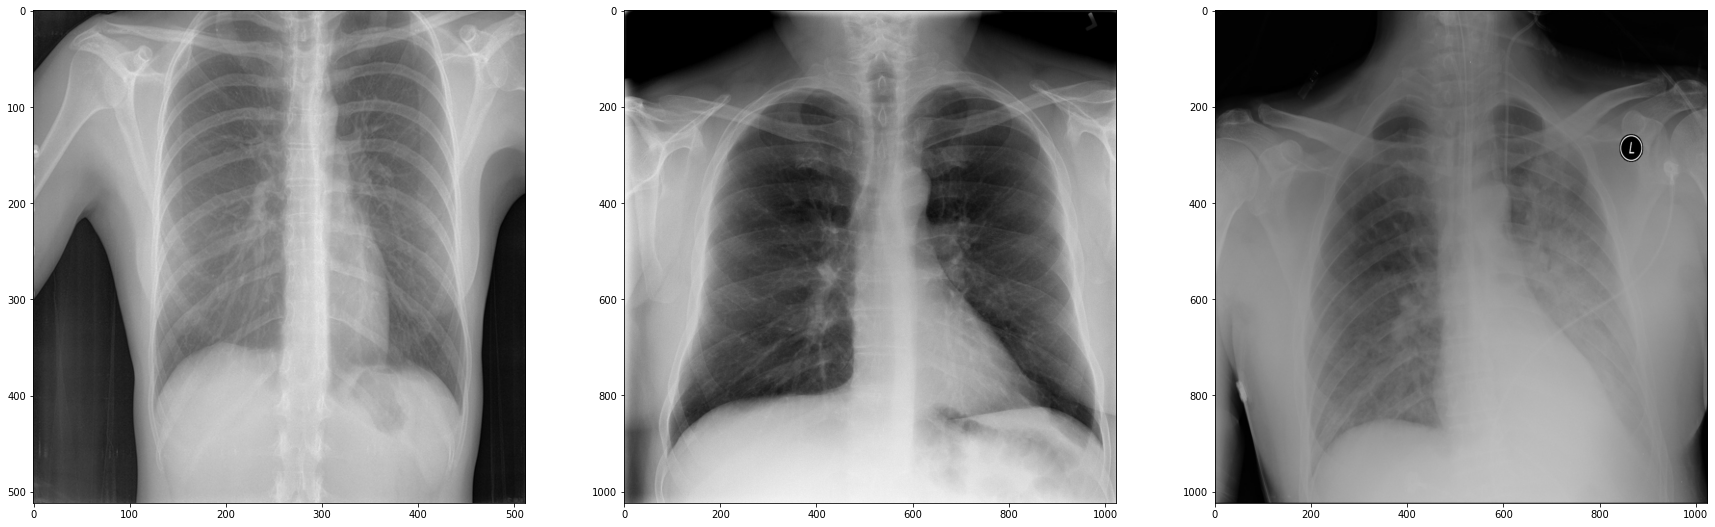

In [ ]:

plt.figure(figsize=(30,10))
img_covid = cv2.imread(all_covid_files[1])
plt.subplot(1,3,1)
plt.imshow(img_covid)
img_normal = cv2.imread(all_normal_files[1])
plt.subplot(1,3,2)
plt.imshow(img_normal)
img_pneumo = cv2.imread(all_pneumo_files[1])
plt.subplot(1,3,3)
plt.imshow(img_pneumo)
plt.show()

In [1]:


from tensorflow.keras.utils import to_categorical
from PIL import Image

import pandas as pd
import sys
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os
from tensorflow.keras.utils import to_categorical
from PIL import Image

import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Conv2D, MaxPool2D,\
                                    GlobalMaxPool2D, Dropout, SpatialDropout2D, add, concatenate
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.metrics import AUC, Precision, Recall, SensitivityAtSpecificity, PrecisionAtRecall, \
                                     TruePositives, TrueNegatives, FalsePositives, FalseNegatives


from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow import keras

import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import glob
import time
import cv2
import os



In [2]:

dir = glob.glob('train/*')
get_freq = {}
# count = 1
for item in dir:
  freq = len(glob.glob("{}/*".format(item)))
  print(freq)
  item_name  = item.split('/')[1]
  get_freq[item_name] = freq
  #get_freq[count] = freq
  #count += 1
  #get_freq.append(freq)


7151
4273
6534


In [3]:

short_index = {}
total_img_names = []
short_labels = []
for item in dir:
  print(item)
  img_names = glob.glob("{}/*".format(item))[:5]
  print("img names = ",img_names[:10])
  short_name = str(img_names[0].split('.')[0]).split('/')[2].split('_')[0]
  short_index[short_name] = img_names[0].split('/')[1]
  short_labels.append(short_name)
  total_img_names.append(img_names)
print(total_img_names)
print(len(total_img_names))
print(short_labels)
print(short_index)

train/normal
img names =  ['train/normal/normal-0003608.jpg', 'train/normal/normal-0001880.jpg', 'train/normal/normal-0005618.jpg', 'train/normal/normal-0002747.jpg', 'train/normal/normal-0003533.jpg']
train/pneumonia
img names =  ['train/pneumonia/pneumonia0001550.jpg', 'train/pneumonia/pneumonia0001697.jpg', 'train/pneumonia/pneumonia0003925.jpg', 'train/pneumonia/pneumonia0002378.jpg', 'train/pneumonia/pneumonia0002031.jpg']
train/covid
img names =  ['train/covid/covid-0002069.jpg', 'train/covid/covid-0003426.jpg', 'train/covid/cov_111389.jpg', 'train/covid/covid-0004009.jpg', 'train/covid/covid-0000.jpg']
[['train/normal/normal-0003608.jpg', 'train/normal/normal-0001880.jpg', 'train/normal/normal-0005618.jpg', 'train/normal/normal-0002747.jpg', 'train/normal/normal-0003533.jpg'], ['train/pneumonia/pneumonia0001550.jpg', 'train/pneumonia/pneumonia0001697.jpg', 'train/pneumonia/pneumonia0003925.jpg', 'train/pneumonia/pneumonia0002378.jpg', 'train/pneumonia/pneumonia0002031.jpg'], ['t

In [4]:
short_rev_index = {}
for item in short_index:
  short_rev_index[short_index[item]] = item
print(short_rev_index)

index = {}
rev_index = {}
count = 0
for item in get_freq:
  index[item] = count
  rev_index[count] = item
  count += 1 
print(index)
print(rev_index)

{'normal': 'normal-0003608', 'pneumonia': 'pneumonia0001550', 'covid': 'covid-0002069'}
{'normal': 0, 'pneumonia': 1, 'covid': 2}
{0: 'normal', 1: 'pneumonia', 2: 'covid'}


In [5]:
def parse_filepath(filepath):
    try:
        #path, filename = os.path.split(filepath)
        label = filepath.split('/')[1]
        #filename, ext = os.path.splitext(filename)
        #label, _ = filename.split("_")
        return label
    except Exception as e:
        print('error to parse %s. %s' % (filepath, e))
        return None, None

In [6]:
np.random.seed(42)

H, W, C = 360, 360, 3
N_LABELS = len(index)
D = 1

files_train = glob.glob("train/*/*.*")
print("Total files train = ",len(files_train))


# create a pandas data frame of images, age, gender and race
attributes = list(map(parse_filepath, files_train))

df_train = pd.DataFrame(attributes)
df_train['file'] = files_train
df_train.columns = ['label', 'file']
df_train = df_train.dropna()
df_train.tail()


p = np.random.permutation(len(df_train))
train_idx = p[:len(df_train)]


Total files train =  17958


In [7]:
# for item in files_train:
#     if item.split('.')[-1] not in 'jpg' and item.split('.')[-1] not in 'png':
#         print(item)
#     # print(item.split('.')[-1])
#     # break

In [8]:

##################################
H, W, C = 360, 360, 3
N_LABELS = len(index)
D = 1
##################################

files_validation = glob.glob("validation/*/*.*")
print("Total files valid = ",len(files_validation))

# create a pandas data frame of images, age, gender and race
attributes = list(map(parse_filepath, files_validation))

df_val = pd.DataFrame(attributes)
df_val['file'] = files_validation
df_val.columns = ['label', 'file']
df_val = df_val.dropna()
df_val.tail()

print(len(df_val))
p = np.random.permutation(len(df_val))
test_idx = p[:len(df_val)]



Total files valid =  3432
3432


In [9]:
print('train count: %s,  test count: %s' % (
    len(train_idx),  len(test_idx)))


train count: 17958,  test count: 3432


In [10]:
# for item in files_validation:
#     if item.split('.')[-1] not in 'jpg' and item.split('.')[-1] not in 'png':
#         print(item)
#     # print(item.split('.')[-1])
#     # break

In [11]:


from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Flatten, GlobalAveragePooling2D


# Change the pretrained model name according to the given criteria

frozen = InceptionV3 (weights="imagenet", input_shape=(360,360,3), include_top=False)
frozen.summary()

trainable = frozen.output
trainable = GlobalAveragePooling2D()(trainable)
#print(trainable.shape)
trainable = Dense(128, activation="relu")(trainable)
trainable = Dense(32, activation="relu")(trainable)
trainable = Dense(N_LABELS, activation="softmax")(trainable)
model = Model(inputs=frozen.input, outputs=trainable)
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 360, 360, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 179, 179, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 179, 179, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 179, 179, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [19]:
# https://stackoverflow.com/questions/55640149/error-in-keras-when-i-want-to-calculate-the-sensitivity-and-specificity
# add specificity and sensitivity here
# https://datascience.stackexchange.com/questions/33587/keras-custom-loss-function-as-true-negatives-by-true-negatives-plus-false-posit/40746#40746
# add some loss functions here

# Metrics
# https://www.sabinasz.net/unbalanced-classes-machine-learning/

from keras import backend as K

def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())



opt = Adam(learning_rate=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy',
            experimental_run_tf_function=False,
            metrics = ['accuracy', sensitivity, specificity]
            )



In [26]:
# tf.keras.utils.plot_model(model, to_file='Model1.png')
# from IPython.display import Image
# Image(retina=True, filename='Model1.png')

In [15]:
# # data generator function needs to be changed, i.e., preprocessing should be done first
# # to avoid bottlenecks.

# from tensorflow.keras.utils import to_categorical
# from PIL import Image

# def get_data_generator(df, indices, for_training, batch_size=16):
#     images, labels = [], []
#     while True:
#         # print("indices = ",indices)    
#         # print("len indices = ",len(indices))
#         for i in indices:
#             r = df.iloc[i]
#             # print(" r = ", r, " i = ",i)
#             file, label = r['file'], r['label']
#             # print("file, label = ",file, label)
#             im_gray = Image.open(file).convert('L')
#             # print("Shape = ",im_gray.shape)
#             im_gray = im_gray.resize((360,360))
#             im = np.zeros(shape=(360,360,3))
            
#             im[:,:,0] = im_gray
#             im[:,:,1] = im_gray
#             im[:,:,2] = im_gray
#             im = np.array(im) / 255.0

#             # print(im.shape)
#             images.append(im)
#             # print(np.asarray([to_categorical(index[label], N_LABELS)]))
#             # print(np.asarray([to_categorical(index[label], N_LABELS)]).shape)
            
#             labels.append(to_categorical(index[label], N_LABELS))
#             if len(images) >= batch_size:
#                 yield np.array(images), np.array(labels)
#                 images, labels = [], []
#         # if not for_training:
#         #     break


# from tensorflow.keras.utils import to_categorical
# from PIL import Image

# def get_data_generator_custom(df, indices, for_training, batch_size=16):
#     labels = []
#     while True:
#         for i in indices:
#             r = df.iloc[i]
#             file, label = r['file'], r['label']
#             labels.append(to_categorical(index[label], N_LABELS))
#             if len(images) >= batch_size:
#                 yield  np.array(labels)
#                 labels = []


In [ ]:


# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow import keras
# # batch_size = 100
# # valid_batch_size = 32
# batch_size = 32
# valid_batch_size = 32
# train_gen = get_data_generator(df_train, train_idx, for_training=True, batch_size=batch_size)
# valid_gen = get_data_generator(df_val, test_idx, for_training=True, batch_size=valid_batch_size)

# callbacks = [
#     ModelCheckpoint("./model_checkpoint", monitor='val_loss'),
#     #ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4)
# ]

# # for storing logs into tensorboard
# logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# history = model.fit(train_gen,
#                     steps_per_epoch=len(train_idx)//batch_size,
#                     epochs=5,
#                     callbacks=[tensorboard_callback,callbacks],
#                     validation_data=valid_gen,
#                     validation_steps=len(test_idx)//valid_batch_size)

Epoch 1/5
561/561 [==============================] - 1317s 2s/step - loss: 0.4566 - accuracy: 0.8156 - sensitivity: 0.7675 - specificity: 0.9389 - val_loss: 0.2597 - val_accuracy: 0.9036 - val_sensitivity: 0.8995 - val_specificity: 0.9553
INFO:tensorflow:Assets written to: ./model_checkpoint/assets
Epoch 2/5
377/561 [===================>..........] - ETA: 6:44 - loss: 0.2449 - accuracy: 0.9119 - sensitivity: 0.9079 - specificity: 0.9581

KeyboardInterrupt: ignored

In [18]:
! gdown https://drive.google.com/u/2/uc?id=1Ma8-7fG8-CneFcR0qBJ2aXNakKXyujqS

Downloading...
From: https://drive.google.com/u/2/uc?id=1Ma8-7fG8-CneFcR0qBJ2aXNakKXyujqS
To: /content/CXR_Covid-19_50e_InceptionV3_360x360_128-32-3.h5
266MB [00:02, 127MB/s]


In [21]:

from tensorflow import keras
model = keras.models.load_model('CXR_Covid-19_50e_InceptionV3_360x360_128-32-3.h5', custom_objects={'specificity': specificity, 'sensitivity': sensitivity})

Instructions for updating:
Colocations handled automatically by placer.


In [14]:

layer_names = []
filter_depth = []
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
  print(np.array(layer.get_weights()).shape)
#   print(layer.get_weights()[0])
  break
#   filters, biases = 
#   print(layer.get_weights())
#   print(layer.name)
#   print(filters.shape[3])


(1, 3, 3, 3, 32)


In [15]:

layer_names = []
filter_depth = []
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
#   _, _, _, filters, biases = 
  print(layer.name)
  print(np.array(layer.get_weights()).shape)
  layer_names.append(layer.name)
  filter_depth.append(np.array(layer.get_weights()).shape[4])


conv2d
(1, 3, 3, 3, 32)
conv2d_1
(1, 3, 3, 32, 32)
conv2d_2
(1, 3, 3, 32, 64)
conv2d_3
(1, 1, 1, 64, 80)
conv2d_4
(1, 3, 3, 80, 192)
conv2d_8
(1, 1, 1, 192, 64)
conv2d_6
(1, 1, 1, 192, 48)
conv2d_9
(1, 3, 3, 64, 96)
conv2d_5
(1, 1, 1, 192, 64)
conv2d_7
(1, 5, 5, 48, 64)
conv2d_10
(1, 3, 3, 96, 96)
conv2d_11
(1, 1, 1, 192, 32)
conv2d_15
(1, 1, 1, 256, 64)
conv2d_13
(1, 1, 1, 256, 48)
conv2d_16
(1, 3, 3, 64, 96)
conv2d_12
(1, 1, 1, 256, 64)
conv2d_14
(1, 5, 5, 48, 64)
conv2d_17
(1, 3, 3, 96, 96)
conv2d_18
(1, 1, 1, 256, 64)
conv2d_22
(1, 1, 1, 288, 64)
conv2d_20
(1, 1, 1, 288, 48)
conv2d_23
(1, 3, 3, 64, 96)
conv2d_19
(1, 1, 1, 288, 64)
conv2d_21
(1, 5, 5, 48, 64)
conv2d_24
(1, 3, 3, 96, 96)
conv2d_25
(1, 1, 1, 288, 64)
conv2d_27
(1, 1, 1, 288, 64)
conv2d_28
(1, 3, 3, 64, 96)
conv2d_26
(1, 3, 3, 288, 384)
conv2d_29
(1, 3, 3, 96, 96)
conv2d_34
(1, 1, 1, 768, 128)
conv2d_35
(1, 7, 1, 128, 128)
conv2d_31
(1, 1, 1, 768, 128)
conv2d_36
(1, 1, 7, 128, 128)
conv2d_32
(1, 1, 7, 128, 128)
conv2d_

In [16]:
print(len(filter_depth))

94


In [17]:

# https://www.kaggle.com/anktplwl91/visualizing-what-your-convnet-learns

# The purpose of this function is to just convert a numpy array to a standard image format, so that it can be displayed and viewed comfortably
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')

    return x

# This function is used to create a loss function that maximizes the value of a given filter in a convolution layer, and then we use SGD to adjust the values of the
# input image so as to maximize this activation value. We pass the layer name and the filter index to the function as arguments. 'loss' is the mean for that particular
# filter, 'grads' is the gradient calculated for this loss with respect to input image. Finally, SGD is run for 80 iterations which continuously maximizes the response
# to input image by adding the gradient. Finally, it uses 'deprocess_image' to convert this array to a representable image format.

def generate_pattern(layer_name, filter_index, size=150):
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)


In [ ]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions

#%matplotlib inline

from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

# Below are the patterns to which the filters from first convolution layer get activated. As we can see these are very basic cross-sectional patterns formed by
# horizontal and vertical lines, which is what the these filters look in the input image and get activated if they find one.

count = 0
for ln, fd in zip(layer_names,filter_depth):
  count += 1
  if count < 94:
      continue
  size = int(fd/16)
  fig = plt.figure(figsize=(16, size))
  for img in tqdm(range(fd)):
      ax = fig.add_subplot(size, 16, img+1)
      ax = plt.imshow(generate_pattern(ln, img))
      plt.xticks([])
      plt.yticks([])
      fig.subplots_adjust(wspace=0.05, hspace=0.05)
      
  plt.savefig(str(ln+".pdf"),bbox_inches='tight',pad_inches=0,dpi=300, format='pdf')
  plt.savefig(str(ln+".png"),bbox_inches='tight',pad_inches=0,dpi=300)


  7%|▋         | 13/192 [10:41<2:35:09, 52.01s/it]

In [ ]:

from tensorflow.keras.utils import to_categorical
from PIL import Image
from tqdm import tqdm
y_pred_list = []
y_test_list = []

for i in tqdm(test_idx):
    r = df_val.iloc[i]
    file_, label = r['file'], r['label']

    im_gray = Image.open(file_).convert('L')
    # print("Shape = ",im_gray.shape)
    im_gray = im_gray.resize((360,360))
    im = np.zeros(shape=(360,360,3))

    im[:,:,0] = im_gray
    im[:,:,1] = im_gray
    im[:,:,2] = im_gray
    im = np.array(im) / 255.0


    # im = Image.open(file_)
    # im = im.resize((360, 360))
    # im = np.array(im) / 255.0
    # print(im[np.newaxis, ...].shape)
    y_pred = model.predict(im[np.newaxis, ...])
    y_pred_list.append(int(tf.math.argmax(y_pred, axis=-1)))
    #print(index[label])
    y_test_list.append(index[label])
    # print("This = ",rev_index[int(tf.math.argmax(y_pred, axis=-1))])
    # print(to_categorical(index[label], N_LABELS))
    # print(label)
    

100%|██████████| 100/100 [00:15<00:00,  6.46it/s]


In [ ]:
import pickle

with open('y_test_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'wb') as f:
    pickle.dump(y_test_list, f)
with open('y_pred_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'wb') as f:
    pickle.dump(y_pred_list, f)


In [ ]:
with open('y_test_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'rb') as f:
    y_test_list = pickle.load(f)
with open('y_pred_list_{}e_{}_{}_{}.pkl'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'rb') as f:
    y_pred_list = pickle.load(f)
# y_test_list, y_pred_list

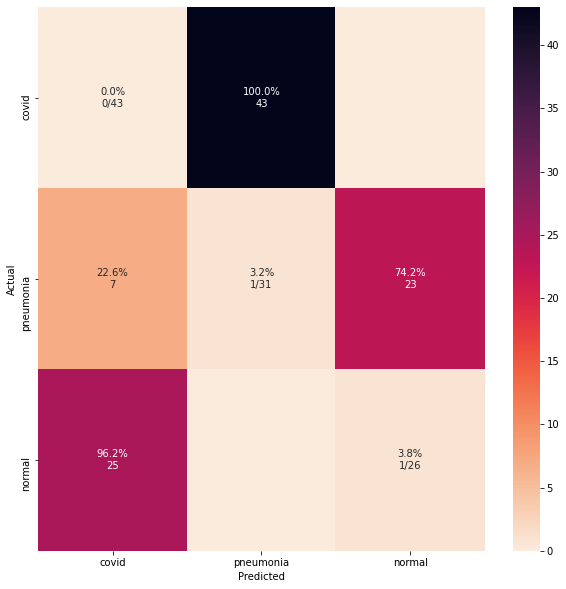

In [ ]:


from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test_list, y_pred_list)
report = classification_report(y_test_list, y_pred_list)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=[rev_index[i] for i in rev_index], columns=[rev_index[i] for i in rev_index])
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='rocket_r')
    #plt.savefig(filename)
    plt.savefig('confusion_matrix_CXR_Covid-19_{}e_{}_{}_{}.png'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS))
    plt.savefig('confusion_matrix_CXR_Covid-19_{}e_{}_{}_{}.eps'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS))
    #plt.show()

cm_analysis(y_test_list, y_pred_list, [i for i in rev_index] , ymap=None, figsize=(10,10))

In [ ]:
[i for i in rev_index]
[rev_index[i] for i in rev_index]

['covid', 'pneumonia', 'normal']

In [ ]:
with open('report_CXR_Covid-19_{}e_{}_{}_{}.txt'.format(EPOCHS, MODEL_NAME,IMG_SIZE,OUTPUT_LAYERS), 'w') as f:
    sys.stdout = f # Change the standard output to the file we created.
    print(report)
    #sys.stdout = original_stdout # Reset the standard output to its original value



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mv /content/CXR_Covid-19_10e_Vgg16.h5 /content/drive/MyDrive/BraTS21/